In [ ]:
#!pip install torch torchvision --index-url https://download.pytorch.org/whl/cu118
#!pip install -U flwr["simulation"]
#!pip install numpy pandas pillow scikit-learn matplotlib tqdm

In [ ]:
#!pip install flwr torch torchvision torchaudio tqdm pillow pandas numpy matplotlib seaborn scikit-learn


In [ ]:
## Pytorch run in terminal
pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu130


In [13]:
# Cell 1: Installation (Run this once)
# This installs all necessary packages for the federated learning project

import sys
import subprocess

def install_packages():
    """Install all required packages for the project"""
    
    packages = [
        #"torch",
        #"torchvision", 
        #"torchaudio",
        "flwr[simulation]",
        #"ray[rllib]",
        "numpy",
        "pandas",
        "pillow",
        "scikit-learn",
        "matplotlib",
        "tqdm",
        "seaborn"
    ]
    
    print("📦 Installing packages for Federated Learning project...")
    print("This may take a few minutes...\n")
    
    for package in packages:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package, "-q"])
    
    # Install flwr with simulation support
    print("Installing flwr[simulation]...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "flwr[simulation]", "-q"])
    
    print("\n✅ All packages installed successfully!")
    print("⚠️  IMPORTANT: Please restart the Jupyter kernel:")
    print("   Kernel → Restart Kernel")
    print("   Then skip this cell and continue with Cell 2")

# Run installation
install_packages()

📦 Installing packages for Federated Learning project...
This may take a few minutes...

Installing flwr[simulation]...
Installing numpy...
Installing pandas...
Installing pillow...
Installing scikit-learn...
Installing matplotlib...
Installing tqdm...
Installing seaborn...
Installing flwr[simulation]...

✅ All packages installed successfully!
⚠️  IMPORTANT: Please restart the Jupyter kernel:
   Kernel → Restart Kernel
   Then skip this cell and continue with Cell 2


In [15]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 3050 Laptop GPU
Using device: cuda


In [16]:
# Cell 2: Import and verify all libraries
# Run this after restarting the kernel to ensure everything is working

print("Importing libraries...")

# Core libraries
import os
import random
import numpy as np
import pandas as pd
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# PyTorch libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
import torchvision
from torchvision import transforms, models
from torchvision.models import ResNet18_Weights

# Image processing
from PIL import Image

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning utilities
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import sklearn

# Progress bar
from tqdm.notebook import tqdm

# Federated Learning
import flwr as fl
print("Flower version:", fl.__version__)
from flwr.simulation import start_simulation

print("\n✅ All libraries imported successfully!")
print(f"\n📊 Package Versions:")
print(f"   PyTorch: {torch.__version__}")
print(f"   Flower (flwr): {fl.__version__}")
print(f"   NumPy: {np.__version__}")
print(f"   Pandas: {pd.__version__}")
print(f"   Scikit-learn: {sklearn.__version__}")

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\n🖥️  Device: {device}")
if torch.cuda.is_available():
    print(f"   GPU: {torch.cuda.get_device_name(0)}")
    print(f"   CUDA Version: {torch.version.cuda}")
else:
    print("   Running on CPU (training will be slower)")

Importing libraries...
Flower version: 1.22.0

✅ All libraries imported successfully!

📊 Package Versions:
   PyTorch: 2.9.0+cu130
   Flower (flwr): 1.22.0
   NumPy: 2.3.4
   Pandas: 2.3.3
   Scikit-learn: 1.7.2

🖥️  Device: cuda
   GPU: NVIDIA GeForce RTX 3050 Laptop GPU
   CUDA Version: 13.0


In [17]:
# Cell 3: Global Configuration
# This cell sets up all the configuration parameters for the project

class Config:
    """Configuration class for the federated learning project"""
    
    # Random seed for reproducibility
    SEED = 42
    
    # Dataset settings
    DATASET_PATH = "./data/HAM10000"  # Path to HAM10000 dataset
    IMAGE_SIZE = (224, 224)  # ResNet18 input size
    NUM_CLASSES = 3  # melanoma, nevi, seborrheic keratoses
    CLASS_NAMES = ['melanoma', 'nevi', 'seborrheic_keratoses']
    
    # Federated Learning settings
    NUM_CLIENTS = 1  # Number of healthcare institutions
    NUM_ROUNDS = 1  # Number of federated learning rounds
    #NUM_MALICIOUS_CLIENTS = 2  # Number of clients to poison
    
    # Model training settings
    BATCH_SIZE = 64
    LOCAL_EPOCHS = 10  # Epochs per client per round
    LEARNING_RATE = 0.001
    
    # Data split
    TRAIN_SPLIT = 0.7
    VAL_SPLIT = 0.15
    TEST_SPLIT = 0.15
    
    # Anomaly detection thresholds
    CONTAMINATION = 0.1  # Expected proportion of outliers
    
    # Device
    DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set random seeds for reproducibility
def set_seed(seed=42):
    """Set random seeds for reproducibility"""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(Config.SEED)

print("✅ Configuration set successfully!")
print(f"\n📋 Project Configuration:")
print(f"   Number of Clients: {Config.NUM_CLIENTS}")
print(f"   Number of Rounds: {Config.NUM_ROUNDS}")
#print(f"   Malicious Clients: {Config.NUM_MALICIOUS_CLIENTS}")
print(f"   Batch Size: {Config.BATCH_SIZE}")
print(f"   Local Epochs: {Config.LOCAL_EPOCHS}")
print(f"   Learning Rate: {Config.LEARNING_RATE}")
print(f"   Device: {Config.DEVICE}")

✅ Configuration set successfully!

📋 Project Configuration:
   Number of Clients: 1
   Number of Rounds: 1
   Batch Size: 64
   Local Epochs: 10
   Learning Rate: 0.001
   Device: cuda


In [3]:
# Cell 5: Download HAM10000 dataset using Kaggle API
# NOTE: You need to set up Kaggle API credentials first
# Instructions: https://www.kaggle.com/docs/api

import subprocess
import zipfile

def download_ham10000():
    """Download HAM10000 dataset from Kaggle"""
    
    try:
        # Check if kaggle is installed
        try:
            import kaggle
            print("✅ Kaggle API is installed")
        except ImportError:
            print("📦 Installing Kaggle API...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", "kaggle", "-q"])
            import kaggle
        
        # Create data directory
        os.makedirs("./data", exist_ok=True)
        
        # Download dataset
        print("📥 Downloading HAM10000 dataset...")
        print("This may take several minutes (about 1.5 GB)...\n")
        
        subprocess.run([
            "kaggle", "datasets", "download", 
            "-d", "kmader/skin-cancer-mnist-ham10000",
            "-p", "./data"
        ])
        
        # Extract dataset
        print("\n📦 Extracting dataset...")
        zip_path = "./data/skin-cancer-mnist-ham10000.zip"
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall("./data/HAM10000")
        
        # Clean up zip file
        os.remove(zip_path)
        
        print("✅ Dataset downloaded and extracted successfully!")
        print(f"   Location: ./data/HAM10000")
        
    except Exception as e:
        print(f"❌ Error: {e}")
        print("\nIf Kaggle API setup failed, please download manually:")
        print("1. Download from: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000")
        print("2. Extract to: ./data/HAM10000/")

# Uncomment the line below to run the download
# download_ham10000()

print("💡 TIP: Uncomment the last line and run this cell to download")
print("   Or download manually and place in ./data/HAM10000/")

💡 TIP: Uncomment the last line and run this cell to download
   Or download manually and place in ./data/HAM10000/


In [18]:
# Cell 6: Dataset Loading and Preparation
# This cell loads the HAM10000 dataset and prepares it for training

class HAM10000Dataset(Dataset):
    """Custom Dataset class for HAM10000 skin lesion images"""
    
    def __init__(self, image_paths, labels, transform=None):
        """
        Args:
            image_paths (list): List of paths to images
            labels (list): List of labels (0, 1, or 2)
            transform (callable, optional): Optional transform to be applied on images
        """
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        # Load image
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        
        # Apply transforms
        if self.transform:
            image = self.transform(image)
        
        # Get label
        label = self.labels[idx]
        
        return image, label


def load_and_prepare_dataset(dataset_path):
    """
    Load HAM10000 dataset and prepare it for federated learning
    
    Args:
        dataset_path (str): Path to HAM10000 dataset directory
    
    Returns:
        tuple: Lists of image paths and corresponding labels
    """
    
    print("📂 Loading HAM10000 dataset...")
    
    # Check if dataset exists
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(
            f"Dataset not found at {dataset_path}\n"
            "Please download the HAM10000 dataset first (see Cell 4)"
        )
    
    # Load metadata
    metadata_path = os.path.join(dataset_path, "HAM10000_metadata.csv")
    
    if not os.path.exists(metadata_path):
        raise FileNotFoundError(
            f"Metadata file not found: {metadata_path}\n"
            "Make sure HAM10000_metadata.csv is in the dataset folder"
        )
    
    metadata = pd.read_csv(metadata_path)
    
    print(f"✅ Loaded metadata: {len(metadata)} images")
    print(f"\n📊 Dataset Statistics:")
    print(metadata['dx'].value_counts())
    
    # Filter for the 3 classes we're using
    # dx: diagnosis - mel (melanoma), nv (nevi), bkl (benign keratosis/seborrheic keratoses)
    classes_to_use = {
        'mel': 0,  # melanoma
        'nv': 1,   # nevi
        'bkl': 2   # seborrheic keratoses
    }
    
    # Filter metadata
    filtered_metadata = metadata[metadata['dx'].isin(classes_to_use.keys())].copy()
    filtered_metadata['label'] = filtered_metadata['dx'].map(classes_to_use)
    
    print(f"\n✅ Filtered to 3 classes: {len(filtered_metadata)} images")
    print("\nClass distribution:")
    for class_name, label in classes_to_use.items():
        count = (filtered_metadata['label'] == label).sum()
        print(f"   {class_name}: {count} images (label {label})")
    
    # Get image paths
    image_paths = []
    labels = []
    
    # Check both image directories
    img_dirs = [
        os.path.join(dataset_path, "HAM10000_images_part_1"),
        os.path.join(dataset_path, "HAM10000_images_part_2")
    ]
    
    for _, row in tqdm(filtered_metadata.iterrows(), total=len(filtered_metadata), desc="Processing images"):
        image_id = row['image_id']
        label = row['label']
        
        # Find image in either directory
        img_found = False
        for img_dir in img_dirs:
            img_path = os.path.join(img_dir, f"{image_id}.jpg")
            if os.path.exists(img_path):
                image_paths.append(img_path)
                labels.append(label)
                img_found = True
                break
        
        if not img_found:
            print(f"Warning: Image not found: {image_id}")
    
    print(f"\n✅ Successfully loaded {len(image_paths)} images")
    
    return image_paths, labels


# Define image transformations
def get_transforms():
    """
    Get image transformations for training and validation
    
    Returns:
        tuple: (train_transform, val_transform)
    """
    
    # Training transforms with data augmentation
    train_transform = transforms.Compose([
        transforms.Resize(Config.IMAGE_SIZE),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomRotation(20),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Validation/Test transforms (no augmentation)
    val_transform = transforms.Compose([
        transforms.Resize(Config.IMAGE_SIZE),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    return train_transform, val_transform


# Load dataset
try:
    image_paths, labels = load_and_prepare_dataset(Config.DATASET_PATH)
    train_transform, val_transform = get_transforms()
    print("\n✅ Dataset preparation complete!")
except Exception as e:
    print(f"\n❌ Error loading dataset: {e}")
    print("Please make sure the HAM10000 dataset is downloaded and placed correctly")

📂 Loading HAM10000 dataset...
✅ Loaded metadata: 10015 images

📊 Dataset Statistics:
dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

✅ Filtered to 3 classes: 8917 images

Class distribution:
   mel: 1113 images (label 0)
   nv: 6705 images (label 1)
   bkl: 1099 images (label 2)


Processing images:   0%|          | 0/8917 [00:00<?, ?it/s]


✅ Successfully loaded 8917 images

✅ Dataset preparation complete!


In [19]:
# Cell 7: ResNet18 Model Definition
# This cell defines the ResNet18 model for skin cancer classification

class SkinCancerResNet18(nn.Module):
    """
    ResNet18 model adapted for skin cancer classification
    Uses pretrained weights from ImageNet for transfer learning
    Much lighter than VGG16 - only ~11M parameters vs 138M
    """
    
    def __init__(self, num_classes=3, pretrained=True):
        """
        Args:
            num_classes (int): Number of output classes (default: 3)
            pretrained (bool): Use pretrained ImageNet weights (default: True)
        """
        super(SkinCancerResNet18, self).__init__()
        
        # Load pretrained ResNet18 model
        if pretrained:
            self.resnet18 = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
            print("✅ Loaded ResNet18 with pretrained ImageNet weights")
        else:
            self.resnet18 = models.resnet18(weights=None)
            print("⚠️  Loaded ResNet18 without pretrained weights")
        
        # Get the number of input features for the final layer
        num_features = self.resnet18.fc.in_features
        
        # Replace the final fully connected layer
        # Original ResNet18 FC was for 1000 classes (ImageNet)
        self.resnet18.fc = nn.Linear(num_features, num_classes)
        
        print(f"✅ Model configured for {num_classes} classes")
        print(f"   Final layer: Linear({num_features} -> {num_classes})")
    
    def forward(self, x):
        """
        Forward pass through the network
        
        Args:
            x (torch.Tensor): Input images [batch_size, 3, 224, 224]
        
        Returns:
            torch.Tensor: Class predictions [batch_size, num_classes]
        """
        return self.resnet18(x)
    
    def extract_features(self, x):
        """
        Extract features before the final classification layer
        Useful for anomaly detection
        
        Args:
            x (torch.Tensor): Input images
        
        Returns:
            torch.Tensor: Extracted features [batch_size, 512]
        """
        # Forward pass through all layers except the final FC
        x = self.resnet18.conv1(x)
        x = self.resnet18.bn1(x)
        x = self.resnet18.relu(x)
        x = self.resnet18.maxpool(x)
        
        x = self.resnet18.layer1(x)
        x = self.resnet18.layer2(x)
        x = self.resnet18.layer3(x)
        x = self.resnet18.layer4(x)
        
        x = self.resnet18.avgpool(x)
        x = torch.flatten(x, 1)
        
        return x


def create_model():
    """
    Create and initialize the ResNet18 model
    
    Returns:
        SkinCancerResNet18: Initialized model on the configured device
    """
    model = SkinCancerResNet18(num_classes=Config.NUM_CLASSES, pretrained=True)
    model = model.to(Config.DEVICE)
    
    # Print model summary
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    
    print(f"\n📊 Model Summary:")
    print(f"   Total parameters: {total_params:,}")
    print(f"   Trainable parameters: {trainable_params:,}")
    print(f"   Device: {Config.DEVICE}")
    print(f"\n💡 ResNet18 is ~23x lighter than VGG16!")
    print(f"   ResNet18: ~11M parameters")
    print(f"   VGG16: ~138M parameters")
    
    return model


# Create the model
print("🔨 Creating ResNet18 model for skin cancer classification...\n")
model = create_model()
print("\n✅ Model created successfully!")

🔨 Creating ResNet18 model for skin cancer classification...

✅ Loaded ResNet18 with pretrained ImageNet weights
✅ Model configured for 3 classes
   Final layer: Linear(512 -> 3)

📊 Model Summary:
   Total parameters: 11,178,051
   Trainable parameters: 11,178,051
   Device: cuda

💡 ResNet18 is ~23x lighter than VGG16!
   ResNet18: ~11M parameters
   VGG16: ~138M parameters

✅ Model created successfully!


In [20]:
# Cell 8: Split Data Among Clients for Federated Learning
# This distributes the dataset across multiple simulated healthcare institutions

def split_data_for_federated_learning(image_paths, labels, num_clients=10):
    """
    Split dataset among multiple clients for federated learning
    
    Args:
        image_paths (list): List of image paths
        labels (list): List of labels
        num_clients (int): Number of clients to split data among
    
    Returns:
        list: List of tuples (train_paths, train_labels, val_paths, val_labels) for each client
    """
    
    print(f"\n🔀 Splitting data among {num_clients} clients...")
    
    # Convert to numpy arrays for easier manipulation
    image_paths = np.array(image_paths)
    labels = np.array(labels)
    
    # Shuffle data
    indices = np.arange(len(image_paths))
    np.random.shuffle(indices)
    image_paths = image_paths[indices]
    labels = labels[indices]
    
    # Split into num_clients chunks
    client_data = []
    samples_per_client = len(image_paths) // num_clients
    
    for i in range(num_clients):
        start_idx = i * samples_per_client
        
        # Last client gets remaining samples
        if i == num_clients - 1:
            end_idx = len(image_paths)
        else:
            end_idx = (i + 1) * samples_per_client
        
        # Get client's data
        client_paths = image_paths[start_idx:end_idx]
        client_labels = labels[start_idx:end_idx]
        
        # Split into train (80%) and validation (20%)
        split_point = int(len(client_paths) * 0.8)
        
        train_paths = client_paths[:split_point]
        train_labels = client_labels[:split_point]
        val_paths = client_paths[split_point:]
        val_labels = client_labels[split_point:]
        
        client_data.append((train_paths, train_labels, val_paths, val_labels))
        
        print(f"   Client {i}: Train={len(train_paths)}, Val={len(val_paths)}")
    
    print(f"\n✅ Data split complete!")
    return client_data


# Create global test set (separate from client data)
def create_test_set(image_paths, labels, test_size=0.15):
    """
    Create a global test set for server evaluation
    
    Args:
        image_paths (list): All image paths
        labels (list): All labels
        test_size (float): Proportion of data for testing
    
    Returns:
        tuple: (test_paths, test_labels, remaining_paths, remaining_labels)
    """
    
    print(f"\n🧪 Creating global test set ({int(test_size*100)}% of data)...")
    
    # Convert to numpy
    image_paths = np.array(image_paths)
    labels = np.array(labels)
    
    # Shuffle
    indices = np.arange(len(image_paths))
    np.random.shuffle(indices)
    image_paths = image_paths[indices]
    labels = labels[indices]
    
    # Split
    split_point = int(len(image_paths) * test_size)
    
    test_paths = image_paths[:split_point]
    test_labels = labels[:split_point]
    remaining_paths = image_paths[split_point:]
    remaining_labels = labels[split_point:]
    
    print(f"✅ Test set: {len(test_paths)} images")
    print(f"✅ Remaining for clients: {len(remaining_paths)} images")
    
    return test_paths, test_labels, remaining_paths, remaining_labels


# Execute data splitting
print("=" * 70)
print("📊 PREPARING DATA FOR FEDERATED LEARNING")
print("=" * 70)

# Create test set first
test_paths, test_labels, client_paths, client_labels = create_test_set(
    image_paths, labels, test_size=0.15
)

# Split remaining data among clients
client_data = split_data_for_federated_learning(
    client_paths, client_labels, num_clients=Config.NUM_CLIENTS
)

# Create test dataset
test_dataset = HAM10000Dataset(test_paths, test_labels, transform=val_transform)

print("\n" + "=" * 70)
print(f"✅ Data preparation complete!")
print(f"   • {Config.NUM_CLIENTS} clients ready")
print(f"   • Test set: {len(test_dataset)} images")
print("=" * 70)

📊 PREPARING DATA FOR FEDERATED LEARNING

🧪 Creating global test set (15% of data)...
✅ Test set: 1337 images
✅ Remaining for clients: 7580 images

🔀 Splitting data among 1 clients...
   Client 0: Train=6064, Val=1516

✅ Data split complete!

✅ Data preparation complete!
   • 1 clients ready
   • Test set: 1337 images


In [21]:
# Cell 9: Federated Learning Client Implementation
# Each client represents a healthcare institution with local data

from collections import OrderedDict

class FlowerClient(fl.client.NumPyClient):
    """
    Flower client for federated learning
    Trains model locally and communicates with central server
    """
    
    def __init__(self, cid, train_data, val_data, device):
        """
        Args:
            cid (int): Client ID
            train_data (tuple): (image_paths, labels) for training
            val_data (tuple): (image_paths, labels) for validation
            device: torch device (CPU or CUDA)
        """
        self.cid = cid
        self.device = device
        
        # Create datasets
        train_paths, train_labels = train_data
        val_paths, val_labels = val_data
        
        self.train_dataset = HAM10000Dataset(
            train_paths, train_labels, transform=train_transform
        )
        self.val_dataset = HAM10000Dataset(
            val_paths, val_labels, transform=val_transform
        )
        
        # Create data loaders
        self.train_loader = DataLoader(
            self.train_dataset,
            batch_size=Config.BATCH_SIZE,
            shuffle=True,
            num_workers=0,  # Set to 0 for Windows compatibility
            pin_memory=True if device.type == 'cuda' else False
        )
        
        self.val_loader = DataLoader(
            self.val_dataset,
            batch_size=Config.BATCH_SIZE,
            shuffle=False,
            num_workers=0,
            pin_memory=True if device.type == 'cuda' else False
        )
        
        # Create model
        self.model = create_model()
        
        # Loss and optimizer
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=Config.LEARNING_RATE)
        
        print(f"✅ Client {cid} initialized: Train={len(self.train_dataset)}, Val={len(self.val_dataset)}")
    
    def get_parameters(self, config):
        """Get model parameters as numpy arrays"""
        return [val.cpu().numpy() for _, val in self.model.state_dict().items()]
    
    def set_parameters(self, parameters):
        """Set model parameters from numpy arrays"""
        params_dict = zip(self.model.state_dict().keys(), parameters)
        state_dict = OrderedDict({k: torch.tensor(v) for k, v in params_dict})
        self.model.load_state_dict(state_dict, strict=True)
    
    def fit(self, parameters, config):
        """Train model on local data"""
        
        # Set parameters from server
        self.set_parameters(parameters)
        
        # Get number of epochs from config
        epochs = config.get("local_epochs", Config.LOCAL_EPOCHS)
        
        print(f"\n🏋️  Client {self.cid} training for {epochs} epochs...")
        
        self.model.train()
        
        for epoch in range(epochs):
            epoch_loss = 0.0
            correct = 0
            total = 0
            
            # Training loop
            progress_bar = tqdm(self.train_loader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)
            
            for images, labels in progress_bar:
                images = images.to(self.device)
                labels = labels.to(self.device)
                
                # Forward pass
                self.optimizer.zero_grad()
                outputs = self.model(images)
                loss = self.criterion(outputs, labels)
                
                # Backward pass
                loss.backward()
                self.optimizer.step()
                
                # Calculate accuracy
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                epoch_loss += loss.item()
                
                # Update progress bar
                progress_bar.set_postfix({
                    'loss': f'{loss.item():.4f}',
                    'acc': f'{100 * correct / total:.2f}%'
                })
            
            # Calculate epoch metrics
            avg_loss = epoch_loss / len(self.train_loader)
            accuracy = 100 * correct / total
            
            print(f"  Epoch {epoch+1}: Loss={avg_loss:.4f}, Accuracy={accuracy:.2f}%")
        
        # Return updated parameters and metrics
        return self.get_parameters(config={}), len(self.train_dataset), {
            "client_id": self.cid,
            "train_loss": float(avg_loss),
            "train_accuracy": float(accuracy)
        }
    
    def evaluate(self, parameters, config):
        """Evaluate model on validation data"""
        
        # Set parameters from server
        self.set_parameters(parameters)
        
        self.model.eval()
        
        val_loss = 0.0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for images, labels in self.val_loader:
                images = images.to(self.device)
                labels = labels.to(self.device)
                
                outputs = self.model(images)
                loss = self.criterion(outputs, labels)
                
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                val_loss += loss.item()
        
        avg_loss = val_loss / len(self.val_loader)
        accuracy = 100 * correct / total
        
        return float(avg_loss), len(self.val_dataset), {"val_accuracy": float(accuracy)}


print("✅ FlowerClient class defined successfully!")

✅ FlowerClient class defined successfully!


In [22]:
# Cell 10: Server-Side Evaluation Function
# Evaluates global model on centralized test set

def get_evaluate_fn(test_dataset, device):
    """
    Return evaluation function for server
    
    Args:
        test_dataset: PyTorch dataset for testing
        device: torch device
    
    Returns:
        function: Evaluation function
    """
    
    def evaluate(server_round, parameters, config):
        """
        Evaluate global model on test set
        
        Args:
            server_round (int): Current round number
            parameters: Model parameters
            config: Configuration dict
        
        Returns:
            tuple: (loss, metrics_dict)
        """
        
        # Create model and set parameters
        model = create_model()
        params_dict = zip(model.state_dict().keys(), parameters)
        state_dict = OrderedDict({k: torch.tensor(v) for k, v in params_dict})
        model.load_state_dict(state_dict, strict=True)
        model.eval()
        
        # Create test loader
        test_loader = DataLoader(
            test_dataset,
            batch_size=Config.BATCH_SIZE,
            shuffle=False,
            num_workers=0
        )
        
        criterion = nn.CrossEntropyLoss()
        
        test_loss = 0.0
        correct = 0
        total = 0
        
        print(f"\n🔍 Server evaluating global model (Round {server_round})...")
        
        with torch.no_grad():
            for images, labels in test_loader:
                images = images.to(device)
                labels = labels.to(device)
                
                outputs = model(images)
                loss = criterion(outputs, labels)
                
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                test_loss += loss.item()
        
        avg_loss = test_loss / len(test_loader)
        accuracy = 100 * correct / total
        
        print(f"  Global Test: Loss={avg_loss:.4f}, Accuracy={accuracy:.2f}%")
        
        return float(avg_loss), {"accuracy": float(accuracy)}
    
    return evaluate


print("✅ Server evaluation function defined!")

✅ Server evaluation function defined!


In [23]:
# Cell 11: FedAvg Strategy Configuration
# Configures how the server aggregates client updates

def weighted_average(metrics):
    """Aggregate metrics using weighted average"""
    
    # Extract number of examples and metrics
    total_examples = sum([num_examples for num_examples, _ in metrics])
    
    if not metrics:
        return {}
    
    aggregated = {}
    metric_keys = metrics[0][1].keys()
    
    for key in metric_keys:
        if isinstance(metrics[0][1][key], (int, float)):
            weighted_sum = sum([num_examples * m[key] for num_examples, m in metrics])
            aggregated[key] = weighted_sum / total_examples
    
    return aggregated


def fit_config(server_round):
    """Configuration sent to clients for training"""
    
    config = {
        "server_round": server_round,
        "local_epochs": Config.LOCAL_EPOCHS,
    }
    return config


# Create initial model to get parameters
initial_model = create_model()
initial_parameters = [val.cpu().numpy() for _, val in initial_model.state_dict().items()]

# Create FedAvg strategy
strategy = fl.server.strategy.FedAvg(
    fraction_fit=1.0,  # Use all clients for training
    fraction_evaluate=1.0,  # Use all clients for evaluation
    min_fit_clients=Config.NUM_CLIENTS,
    min_evaluate_clients=Config.NUM_CLIENTS,
    min_available_clients=Config.NUM_CLIENTS,
    evaluate_fn=get_evaluate_fn(test_dataset, Config.DEVICE),
    on_fit_config_fn=fit_config,
    fit_metrics_aggregation_fn=weighted_average,
    evaluate_metrics_aggregation_fn=weighted_average,
    initial_parameters=fl.common.ndarrays_to_parameters(initial_parameters),
)

print("✅ FedAvg strategy configured!")
print(f"   • Clients per round: {Config.NUM_CLIENTS}")
print(f"   • Local epochs: {Config.LOCAL_EPOCHS}")

✅ Loaded ResNet18 with pretrained ImageNet weights
✅ Model configured for 3 classes
   Final layer: Linear(512 -> 3)

📊 Model Summary:
   Total parameters: 11,178,051
   Trainable parameters: 11,178,051
   Device: cuda

💡 ResNet18 is ~23x lighter than VGG16!
   ResNet18: ~11M parameters
   VGG16: ~138M parameters
✅ FedAvg strategy configured!
   • Clients per round: 1
   • Local epochs: 10


In [24]:
# Cell 12: Client Function Factory
# Creates client instances for Flower simulation

def client_fn(cid):
    """
    Create a Flower client instance
    
    Args:
        cid (str): Client ID as string
    
    Returns:
        FlowerClient: Client instance
    """
    
    # Convert client ID to integer
    client_id = int(cid)
    
    # Get client's data
    train_paths, train_labels, val_paths, val_labels = client_data[client_id]
    
    # Create and return client
    return FlowerClient(
        cid=client_id,
        train_data=(train_paths, train_labels),
        val_data=(val_paths, val_labels),
        device=Config.DEVICE
    )


print("✅ Client factory function defined!")

✅ Client factory function defined!


In [ ]:
# Cell 13: Start Federated Learning Training (WITHOUT Ray)
# Sequential client training - compatible with Python 3.13+

import time
from typing import List, Tuple, Dict

print("\n" + "=" * 70)
print("🚀 STARTING FEDERATED LEARNING TRAINING (Sequential Mode)")
print("=" * 70)

print(f"""
⚙️  Training Configuration:
   • Number of Rounds: {Config.NUM_ROUNDS}
   • Number of Clients: {Config.NUM_CLIENTS}
   • Local Epochs per Round: {Config.LOCAL_EPOCHS}
   • Batch Size: {Config.BATCH_SIZE}
   • Learning Rate: {Config.LEARNING_RATE}
   • Device: {Config.DEVICE}

⏱️  Estimated Time: ~{Config.NUM_ROUNDS * 30} minutes
   (Sequential training - one client at a time)

⚠️  NOTE: Using sequential training (no Ray required)
   • Clients train one after another (not in parallel)
   • More compatible but slower than parallel simulation
   • Perfect for Python 3.13+
""")

# Storage for training history
training_history = {
    'losses_centralized': [],
    'metrics_centralized': [],
    'losses_distributed': [],
    'metrics_distributed': [],
}

# Create global model
print("\n🏗️  Initializing global model...")
global_model = create_model()
global_parameters = [val.cpu().numpy() for _, val in global_model.state_dict().items()]

# Create all clients
print(f"\n👥 Creating {Config.NUM_CLIENTS} clients...")
clients = []
for cid in range(Config.NUM_CLIENTS):
    train_paths, train_labels, val_paths, val_labels = client_data[cid]
    client = FlowerClient(
        cid=cid,
        train_data=(train_paths, train_labels),
        val_data=(val_paths, val_labels),
        device=Config.DEVICE
    )
    clients.append(client)

print(f"✅ All {Config.NUM_CLIENTS} clients created!\n")

# Training configuration
fit_config = {
    "local_epochs": Config.LOCAL_EPOCHS,
}

print("=" * 70)
print("🏋️  STARTING FEDERATED TRAINING")
print("=" * 70)

# Main federated learning loop
for round_num in range(1, Config.NUM_ROUNDS + 1):
    
    round_start_time = time.time()
    
    print(f"\n{'='*70}")
    print(f"📍 ROUND {round_num}/{Config.NUM_ROUNDS}")
    print(f"{'='*70}")
    
    # Store client results for this round
    client_results = []
    client_metrics = []
    
    # Train each client sequentially
    print(f"\n🔄 Training clients...")
    
    for client_idx, client in enumerate(clients):
        
        print(f"\n--- Client {client_idx} ---")
        
        try:
            # Client trains on local data
            updated_params, num_examples, metrics = client.fit(global_parameters, fit_config)
            
            # Store results
            client_results.append((updated_params, num_examples))
            client_metrics.append((num_examples, metrics))
            
            print(f"✅ Client {client_idx} completed: "
                  f"Loss={metrics['train_loss']:.4f}, "
                  f"Accuracy={metrics['train_accuracy']:.2f}%")
            
        except Exception as e:
            print(f"❌ Client {client_idx} failed: {e}")
            continue
    
    # Aggregate client updates (FedAvg)
    print(f"\n🔄 Aggregating updates from {len(client_results)} clients...")
    
    if len(client_results) > 0:
        # Calculate weighted average of parameters
        total_examples = sum([num_examples for _, num_examples in client_results])
        
        # Initialize aggregated parameters
        aggregated_params = [
            np.zeros_like(param) for param in client_results[0][0]
        ]
        
        # Weighted average
        for client_params, num_examples in client_results:
            weight = num_examples / total_examples
            for i, param in enumerate(client_params):
                aggregated_params[i] += param * weight
        
        # Update global parameters
        global_parameters = aggregated_params
        
        print(f"✅ Aggregation complete!")
        
        # Aggregate client metrics
        if client_metrics:
            total_examples = sum([num for num, _ in client_metrics])
            avg_train_loss = sum([num * m['train_loss'] for num, m in client_metrics]) / total_examples
            avg_train_acc = sum([num * m['train_accuracy'] for num, m in client_metrics]) / total_examples
            
            training_history['losses_distributed'].append(float(avg_train_loss))
            training_history['metrics_distributed'].append({
                'train_accuracy': float(avg_train_acc)
            })
    
    # Server-side evaluation on test set
    print(f"\n🔍 Server evaluating global model...")
    
    # Set global model parameters
    params_dict = zip(global_model.state_dict().keys(), global_parameters)
    state_dict = OrderedDict({k: torch.tensor(v) for k, v in params_dict})
    global_model.load_state_dict(state_dict, strict=True)
    global_model.eval()
    
    # Evaluate on test set
    test_loader = DataLoader(
        test_dataset,
        batch_size=Config.BATCH_SIZE,
        shuffle=False,
        num_workers=0
    )
    
    criterion = nn.CrossEntropyLoss()
    test_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(Config.DEVICE)
            labels = labels.to(Config.DEVICE)
            
            outputs = global_model(images)
            loss = criterion(outputs, labels)
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            test_loss += loss.item()
    
    avg_test_loss = test_loss / len(test_loader)
    test_accuracy = 100 * correct / total
    
    # Store centralized metrics
    training_history['losses_centralized'].append(float(avg_test_loss))
    training_history['metrics_centralized'].append({
        'accuracy': float(test_accuracy)
    })
    
    # Print round summary
    round_time = time.time() - round_start_time
    
    print(f"\n{'='*70}")
    print(f"📊 ROUND {round_num} SUMMARY")
    print(f"{'='*70}")
    print(f"   Global Test Loss: {avg_test_loss:.4f}")
    print(f"   Global Test Accuracy: {test_accuracy:.2f}%")
    print(f"   Round Time: {round_time/60:.1f} minutes")
    print(f"{'='*70}")

print("\n" + "=" * 70)
print("✅ TRAINING COMPLETED!")
print("=" * 70)

# Create history object compatible with Flower's format
class TrainingHistory:
    """Mimics Flower's History object"""
    def __init__(self, history_dict, final_params):
        self.losses_centralized = history_dict['losses_centralized']
        self.metrics_centralized = history_dict['metrics_centralized']
        self.losses_distributed = history_dict['losses_distributed']
        self.metrics_distributed = history_dict['metrics_distributed']
        self.parameters = final_params

# Create final history object
final_params_flower = fl.common.ndarrays_to_parameters(global_parameters)
history = TrainingHistory(training_history, final_params_flower)

print(f"\n✅ Training history saved!")
print(f"   • Total rounds completed: {Config.NUM_ROUNDS}")
print(f"   • Final test accuracy: {training_history['metrics_centralized'][-1]['accuracy']:.2f}%")
print(f"   • Final test loss: {training_history['losses_centralized'][-1]:.4f}")

###memory efficient 

In [25]:
# Cell 13: Start Federated Learning Training (Memory Efficient - No Ray)
# Creates clients on-demand and clears memory after each client

import time
from typing import List, Tuple, Dict
import gc
import numpy as np
from collections import OrderedDict
import torch

print("\n" + "=" * 70)
print("🚀 STARTING FEDERATED LEARNING TRAINING (Memory-Efficient Mode)")
print("=" * 70)

print(f"""
⚙️  Training Configuration:
   • Number of Rounds: {Config.NUM_ROUNDS}
   • Number of Clients: {Config.NUM_CLIENTS}
   • Local Epochs per Round: {Config.LOCAL_EPOCHS}
   • Batch Size: {Config.BATCH_SIZE}
   • Learning Rate: {Config.LEARNING_RATE}
   • Device: {Config.DEVICE}

⏱️  Estimated Time: ~{Config.NUM_ROUNDS * 30} minutes

💾 Memory-Efficient Mode:
   • Creates one client at a time
   • Clears GPU memory after each client
   • Perfect for 4GB GPUs
""")

# Storage for training history
training_history = {
    'losses_centralized': [],
    'metrics_centralized': [],
    'losses_distributed': [],
    'metrics_distributed': [],
}

# Create global model
print("\n🏗️  Initializing global model...")
global_model = create_model()
global_parameters = [val.cpu().numpy() for _, val in global_model.state_dict().items()]

# Delete global_model to free memory (we only need parameters)
del global_model
if torch.cuda.is_available():
    torch.cuda.empty_cache()
gc.collect()

print(f"✅ Global model initialized!")
print(f"💾 GPU Memory: {torch.cuda.memory_allocated()/1e9:.2f} GB allocated")

# Training configuration
fit_config = {
    "local_epochs": Config.LOCAL_EPOCHS,
}

print("\n" + "=" * 70)
print("🏋️  STARTING FEDERATED TRAINING")
print("=" * 70)

# Main federated learning loop
for round_num in range(1, Config.NUM_ROUNDS + 1):
    
    round_start_time = time.time()
    
    print(f"\n{'='*70}")
    print(f"📍 ROUND {round_num}/{Config.NUM_ROUNDS}")
    print(f"{'='*70}")
    
    # Store client results for this round
    client_results = []
    client_metrics = []
    
    # Train each client sequentially (CREATE AND DESTROY EACH CLIENT)
    print(f"\n🔄 Training clients...")
    
    for client_idx in range(Config.NUM_CLIENTS):
        
        print(f"\n--- Client {client_idx} ---")
        
        try:
            # CREATE CLIENT (only this one client exists in memory)
            train_paths, train_labels, val_paths, val_labels = client_data[client_idx]
            client = FlowerClient(
                cid=client_idx,
                train_data=(train_paths, train_labels),
                val_data=(val_paths, val_labels),
                device=Config.DEVICE
            )
            
            # Client trains on local data
            updated_params, num_examples, metrics = client.fit(global_parameters, fit_config)
            
            # Store results
            client_results.append((updated_params, num_examples))
            client_metrics.append((num_examples, metrics))
            
            print(f"✅ Client {client_idx} completed: "
                  f"Loss={metrics['train_loss']:.4f}, "
                  f"Accuracy={metrics['train_accuracy']:.2f}%")
            
            # CRITICAL: DELETE CLIENT AND FREE MEMORY
            del client
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
            gc.collect()
            
            print(f"💾 GPU Memory after cleanup: {torch.cuda.memory_allocated()/1e9:.2f} GB")
            
        except Exception as e:
            print(f"❌ Client {client_idx} failed: {e}")
            # Clean up even on failure
            if 'client' in locals():
                del client
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
            gc.collect()
            continue
    
    # Aggregate client updates (FedAvg)
    print(f"\n🔄 Aggregating updates from {len(client_results)} clients...")
    
    if len(client_results) > 0:
        # Calculate weighted average of parameters
        total_examples = sum([num_examples for _, num_examples in client_results])
        
        # Initialize aggregated parameters
        aggregated_params = [
            np.zeros_like(param, dtype=np.float64) for param in client_results[0][0]
        ]

        total_examples = sum([num_examples for _, num_examples in client_results])

        # Weighted average
        for client_params, num_examples in client_results:
            weight = float(num_examples) / float(total_examples)
            for i, param in enumerate(client_params):
                aggregated_params[i] += param.astype(np.float64) * weight
        
        # Update global parameters
        global_parameters = aggregated_params
        
        print(f"✅ Aggregation complete!")
        
        # Aggregate client metrics
        if client_metrics:
            total_examples = sum([num for num, _ in client_metrics])
            avg_train_loss = sum([num * m['train_loss'] for num, m in client_metrics]) / total_examples
            avg_train_acc = sum([num * m['train_accuracy'] for num, m in client_metrics]) / total_examples
            
            training_history['losses_distributed'].append(float(avg_train_loss))
            training_history['metrics_distributed'].append({
                'train_accuracy': float(avg_train_acc)
            })
    
    # Server-side evaluation on test set
    print(f"\n🔍 Server evaluating global model...")
    
    # Create temporary model for evaluation
    eval_model = create_model()
    
    # Set global model parameters
    params_dict = zip(eval_model.state_dict().keys(), global_parameters)
    state_dict = OrderedDict({k: torch.from_numpy(v.astype(np.float32)) for k, v in params_dict})
    eval_model.load_state_dict(state_dict, strict=True)
    eval_model.eval()
    
    # Evaluate on test set
    test_loader = DataLoader(
        test_dataset,
        batch_size=Config.BATCH_SIZE,
        shuffle=False,
        num_workers=0
    )
    
    criterion = nn.CrossEntropyLoss()
    test_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(Config.DEVICE)
            labels = labels.to(Config.DEVICE)
            
            outputs = eval_model(images)
            loss = criterion(outputs, labels)
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            test_loss += loss.item()
    
    avg_test_loss = test_loss / len(test_loader)
    test_accuracy = 100 * correct / total
    
    # Store centralized metrics
    training_history['losses_centralized'].append(float(avg_test_loss))
    training_history['metrics_centralized'].append({
        'accuracy': float(test_accuracy)
    })
    
    # DELETE evaluation model and free memory
    del eval_model
    del test_loader
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    gc.collect()
    
    # Print round summary
    round_time = time.time() - round_start_time
    
    print(f"\n{'='*70}")
    print(f"📊 ROUND {round_num} SUMMARY")
    print(f"{'='*70}")
    print(f"   Global Test Loss: {avg_test_loss:.4f}")
    print(f"   Global Test Accuracy: {test_accuracy:.2f}%")
    print(f"   Round Time: {round_time/60:.1f} minutes")
    print(f"   GPU Memory: {torch.cuda.memory_allocated()/1e9:.2f} GB")
    print(f"{'='*70}")

print("\n" + "=" * 70)
print("✅ TRAINING COMPLETED!")
print("=" * 70)

# Create history object compatible with Flower's format
class TrainingHistory:
    """Mimics Flower's History object"""
    def __init__(self, history_dict, final_params):
        self.losses_centralized = history_dict['losses_centralized']
        self.metrics_centralized = history_dict['metrics_centralized']
        self.losses_distributed = history_dict['losses_distributed']
        self.metrics_distributed = history_dict['metrics_distributed']
        self.parameters = final_params

# Create final history object
final_params_flower = fl.common.ndarrays_to_parameters(global_parameters)
history = TrainingHistory(training_history, final_params_flower)

print(f"\n✅ Training history saved!")
print(f"   • Total rounds completed: {Config.NUM_ROUNDS}")
print(f"   • Final test accuracy: {training_history['metrics_centralized'][-1]['accuracy']:.2f}%")
print(f"   • Final test loss: {training_history['losses_centralized'][-1]:.4f}")


🚀 STARTING FEDERATED LEARNING TRAINING (Memory-Efficient Mode)

⚙️  Training Configuration:
   • Number of Rounds: 1
   • Number of Clients: 1
   • Local Epochs per Round: 10
   • Batch Size: 64
   • Learning Rate: 0.001
   • Device: cuda

⏱️  Estimated Time: ~30 minutes

💾 Memory-Efficient Mode:
   • Creates one client at a time
   • Clears GPU memory after each client
   • Perfect for 4GB GPUs


🏗️  Initializing global model...
✅ Loaded ResNet18 with pretrained ImageNet weights
✅ Model configured for 3 classes
   Final layer: Linear(512 -> 3)

📊 Model Summary:
   Total parameters: 11,178,051
   Trainable parameters: 11,178,051
   Device: cuda

💡 ResNet18 is ~23x lighter than VGG16!
   ResNet18: ~11M parameters
   VGG16: ~138M parameters
✅ Global model initialized!
💾 GPU Memory: 0.11 GB allocated

🏋️  STARTING FEDERATED TRAINING

📍 ROUND 1/1

🔄 Training clients...

--- Client 0 ---
✅ Loaded ResNet18 with pretrained ImageNet weights
✅ Model configured for 3 classes
   Final layer: Lin

Epoch 1/10:   0%|          | 0/95 [00:00<?, ?it/s]

  Epoch 1: Loss=0.6224, Accuracy=76.55%


Epoch 2/10:   0%|          | 0/95 [00:00<?, ?it/s]

  Epoch 2: Loss=0.5084, Accuracy=78.99%


Epoch 3/10:   0%|          | 0/95 [00:00<?, ?it/s]

  Epoch 3: Loss=0.4910, Accuracy=80.52%


Epoch 4/10:   0%|          | 0/95 [00:00<?, ?it/s]

  Epoch 4: Loss=0.4912, Accuracy=81.02%


Epoch 5/10:   0%|          | 0/95 [00:00<?, ?it/s]

  Epoch 5: Loss=0.4794, Accuracy=81.22%


Epoch 6/10:   0%|          | 0/95 [00:00<?, ?it/s]

  Epoch 6: Loss=0.4578, Accuracy=81.93%


Epoch 7/10:   0%|          | 0/95 [00:00<?, ?it/s]

  Epoch 7: Loss=0.4692, Accuracy=81.22%


Epoch 8/10:   0%|          | 0/95 [00:00<?, ?it/s]

  Epoch 8: Loss=0.4479, Accuracy=81.91%


Epoch 9/10:   0%|          | 0/95 [00:00<?, ?it/s]

  Epoch 9: Loss=0.4514, Accuracy=82.16%


Epoch 10/10:   0%|          | 0/95 [00:00<?, ?it/s]

  Epoch 10: Loss=0.4458, Accuracy=82.70%
✅ Client 0 completed: Loss=0.4458, Accuracy=82.70%
💾 GPU Memory after cleanup: 0.11 GB

🔄 Aggregating updates from 1 clients...
✅ Aggregation complete!

🔍 Server evaluating global model...
✅ Loaded ResNet18 with pretrained ImageNet weights
✅ Model configured for 3 classes
   Final layer: Linear(512 -> 3)

📊 Model Summary:
   Total parameters: 11,178,051
   Trainable parameters: 11,178,051
   Device: cuda

💡 ResNet18 is ~23x lighter than VGG16!
   ResNet18: ~11M parameters
   VGG16: ~138M parameters

📊 ROUND 1 SUMMARY
   Global Test Loss: 0.4850
   Global Test Accuracy: 81.38%
   Round Time: 15.9 minutes
   GPU Memory: 0.15 GB

✅ TRAINING COMPLETED!

✅ Training history saved!
   • Total rounds completed: 1
   • Final test accuracy: 81.38%
   • Final test loss: 0.4850


In [26]:
# Cell 14: Save Training Results

import pickle
from datetime import datetime

# Create results directory
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
results_dir = f"./results/fl_training_{timestamp}"
os.makedirs(results_dir, exist_ok=True)

print("=" * 70)
print("💾 SAVING RESULTS")
print("=" * 70)

# Save final model
if history.parameters:
    final_parameters = fl.common.parameters_to_ndarrays(history.parameters)
    final_model = create_model()
    params_dict = zip(final_model.state_dict().keys(), final_parameters)
    state_dict = {k: torch.tensor(v) for k, v in params_dict}
    final_model.load_state_dict(state_dict, strict=True)
    
    model_path = os.path.join(results_dir, 'final_model.pth')
    torch.save(final_model.state_dict(), model_path)
    print(f"✅ Model saved: {model_path}")

# Save training history
history_dict = {
    'losses_distributed': history.losses_distributed,
    'losses_centralized': history.losses_centralized,
    'metrics_distributed': history.metrics_distributed,
    'metrics_centralized': history.metrics_centralized,
}

history_path = os.path.join(results_dir, 'training_history.pkl')
with open(history_path, 'wb') as f:
    pickle.dump(history_dict, f)
print(f"✅ History saved: {history_path}")

# Save configuration
config_path = os.path.join(results_dir, 'config.txt')
with open(config_path, 'w') as f:
    f.write(f"Federated Learning Configuration\n")
    f.write(f"=" * 50 + "\n")
    f.write(f"Number of Rounds: {Config.NUM_ROUNDS}\n")
    f.write(f"Number of Clients: {Config.NUM_CLIENTS}\n")
    f.write(f"Local Epochs: {Config.LOCAL_EPOCHS}\n")
    f.write(f"Batch Size: {Config.BATCH_SIZE}\n")
    f.write(f"Learning Rate: {Config.LEARNING_RATE}\n")
    f.write(f"Device: {Config.DEVICE}\n")

print(f"✅ Config saved: {config_path}")
print(f"\n📁 All results saved to: {results_dir}")

💾 SAVING RESULTS
✅ Loaded ResNet18 with pretrained ImageNet weights
✅ Model configured for 3 classes
   Final layer: Linear(512 -> 3)

📊 Model Summary:
   Total parameters: 11,178,051
   Trainable parameters: 11,178,051
   Device: cuda

💡 ResNet18 is ~23x lighter than VGG16!
   ResNet18: ~11M parameters
   VGG16: ~138M parameters
✅ Model saved: ./results/fl_training_20251030_210659\final_model.pth
✅ History saved: ./results/fl_training_20251030_210659\training_history.pkl
✅ Config saved: ./results/fl_training_20251030_210659\config.txt

📁 All results saved to: ./results/fl_training_20251030_210659


In [27]:
# Cell 15: Display Training Summary

print("\n" + "=" * 70)
print("📊 TRAINING SUMMARY")
print("=" * 70)

if history.losses_centralized:
    print("\n🎯 Global Model Performance:")
    print("-" * 70)
    
    for round_num, (loss, metrics) in enumerate(
        zip(history.losses_centralized, history.metrics_centralized), start=1
    ):
        acc = metrics.get('accuracy', 0)
        print(f"Round {round_num:2d}: Loss={loss:.4f}, Accuracy={acc:.2f}%")
    
    # Final metrics
    final_loss = history.losses_centralized[-1]
    final_acc = history.metrics_centralized[-1].get('accuracy', 0)
    initial_acc = history.metrics_centralized[0].get('accuracy', 0)
    improvement = final_acc - initial_acc
    
    print("\n" + "=" * 70)
    print(f"🏆 FINAL RESULTS:")
    print(f"   • Final Accuracy: {final_acc:.2f}%")
    print(f"   • Final Loss: {final_loss:.4f}")
    print(f"   • Initial Accuracy: {initial_acc:.2f}%")
    print(f"   • Improvement: +{improvement:.2f}%")
    print("=" * 70)


📊 TRAINING SUMMARY

🎯 Global Model Performance:
----------------------------------------------------------------------
Round  1: Loss=0.4850, Accuracy=81.38%

🏆 FINAL RESULTS:
   • Final Accuracy: 81.38%
   • Final Loss: 0.4850
   • Initial Accuracy: 81.38%
   • Improvement: +0.00%



📊 Creating visualizations...
✅ Plot saved: ./results/fl_training_20251030_210659\training_metrics.png


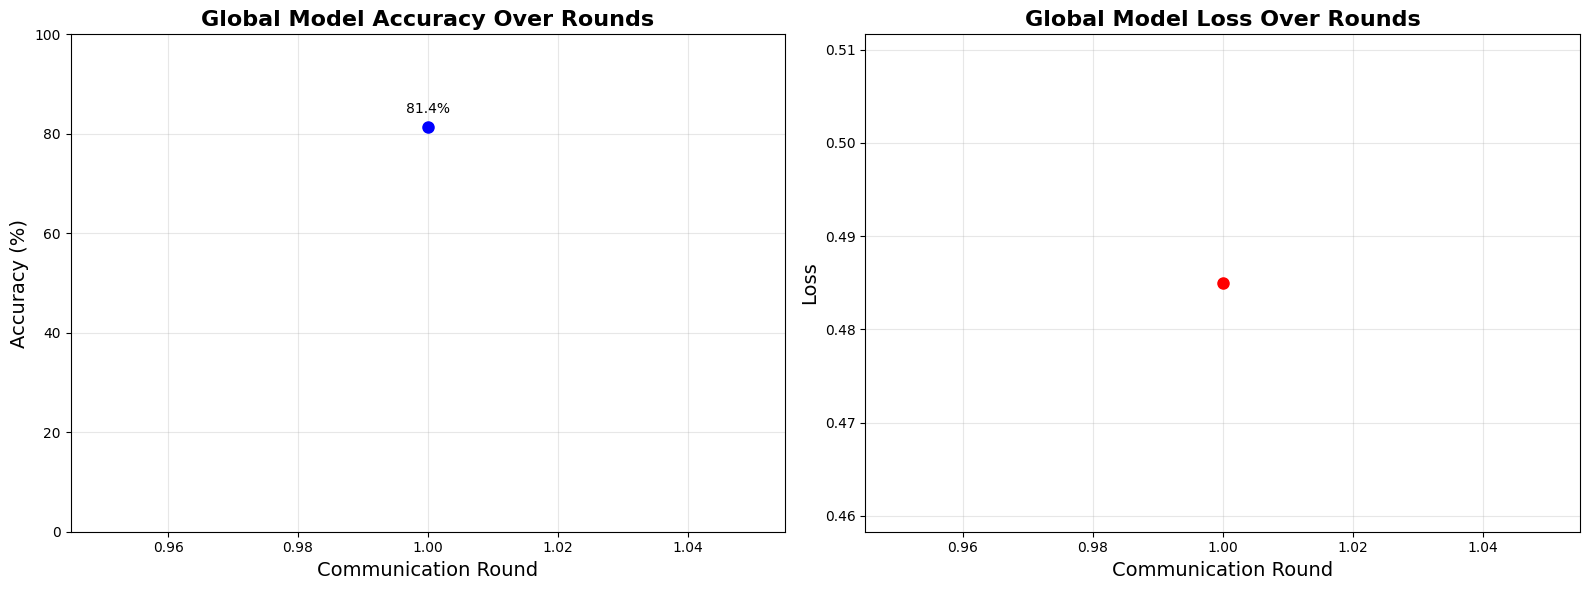

In [28]:
# Cell 16: Visualize Training Results

print("\n📊 Creating visualizations...")

# Extract metrics
rounds = list(range(1, len(history.metrics_centralized) + 1))
accuracies = [m.get('accuracy', 0) for m in history.metrics_centralized]
losses = history.losses_centralized

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot accuracy
ax1.plot(rounds, accuracies, 'b-o', linewidth=2, markersize=8)
ax1.set_xlabel('Communication Round', fontsize=14)
ax1.set_ylabel('Accuracy (%)', fontsize=14)
ax1.set_title('Global Model Accuracy Over Rounds', fontsize=16, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_ylim([0, 100])

# Add accuracy annotations
for i in range(0, len(rounds), max(1, len(rounds)//5)):
    ax1.annotate(f'{accuracies[i]:.1f}%',
                xy=(rounds[i], accuracies[i]),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center',
                fontsize=10)

# Plot loss
ax2.plot(rounds, losses, 'r-o', linewidth=2, markersize=8)
ax2.set_xlabel('Communication Round', fontsize=14)
ax2.set_ylabel('Loss', fontsize=14)
ax2.set_title('Global Model Loss Over Rounds', fontsize=16, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()

# Save plot
plot_path = os.path.join(results_dir, 'training_metrics.png')
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"✅ Plot saved: {plot_path}")

plt.show()

In [29]:
# Cell 17: Detailed Statistics

print("\n" + "=" * 70)
print("📊 DETAILED STATISTICS")
print("=" * 70)

print(f"\n🎯 Accuracy Statistics:")
print(f"   • Initial: {accuracies[0]:.2f}%")
print(f"   • Final: {accuracies[-1]:.2f}%")
print(f"   • Maximum: {max(accuracies):.2f}%")
print(f"   • Minimum: {min(accuracies):.2f}%")
print(f"   • Mean: {np.mean(accuracies):.2f}%")
print(f"   • Std Dev: {np.std(accuracies):.2f}%")
print(f"   • Improvement: +{accuracies[-1] - accuracies[0]:.2f}%")

print(f"\n📉 Loss Statistics:")
print(f"   • Initial: {losses[0]:.4f}")
print(f"   • Final: {losses[-1]:.4f}")
print(f"   • Maximum: {max(losses):.4f}")
print(f"   • Minimum: {min(losses):.4f}")
print(f"   • Mean: {np.mean(losses):.4f}")
print(f"   • Std Dev: {np.std(losses):.4f}")
print(f"   • Reduction: -{losses[0] - losses[-1]:.4f}")

print(f"\n⏱️  Training Info:")
print(f"   • Total Rounds: {Config.NUM_ROUNDS}")
print(f"   • Clients: {Config.NUM_CLIENTS}")
print(f"   • Local Epochs per Round: {Config.LOCAL_EPOCHS}")
print(f"   • Total Local Epochs: {Config.NUM_ROUNDS * Config.NUM_CLIENTS * Config.LOCAL_EPOCHS}")

print("\n" + "=" * 70)


📊 DETAILED STATISTICS

🎯 Accuracy Statistics:
   • Initial: 81.38%
   • Final: 81.38%
   • Maximum: 81.38%
   • Minimum: 81.38%
   • Mean: 81.38%
   • Std Dev: 0.00%
   • Improvement: +0.00%

📉 Loss Statistics:
   • Initial: 0.4850
   • Final: 0.4850
   • Maximum: 0.4850
   • Minimum: 0.4850
   • Mean: 0.4850
   • Std Dev: 0.0000
   • Reduction: -0.0000

⏱️  Training Info:
   • Total Rounds: 1
   • Clients: 1
   • Local Epochs per Round: 10
   • Total Local Epochs: 10



In [ ]:
# Cell 18: Final Summary and Next Steps

print("\n" + "=" * 70)
print("✨ TRAINING COMPLETE - NEXT STEPS")
print("=" * 70)

print(f"""
🎉 Congratulations! Your federated learning training is complete!

📁 Results saved in: {results_dir}

📊 Files created:
   • final_model.pth - Trained model weights
   • training_history.pkl - Complete training history
   • config.txt - Training configuration
   • training_metrics.png - Accuracy and loss plots

🏆 Final Performance:
   • Test Accuracy: {accuracies[-1]:.2f}%
   • Test Loss: {losses[-1]:.4f}

🔬 What you can do next:
   1. Test the model on new images
   2. Implement model poisoning attacks
   3. Add anomaly detection algorithms
   4. Compare with centralized training
   5. Generate confusion matrix
   6. Calculate per-class metrics

💡 To add attacks and detection:
   - Modify client training in Cell 9
   - Add attack functions
   - Implement Isolation Forest/One-Class SVM detection
   - Compare clean vs attacked performance
""")

print("=" * 70)
print("✅ All done! Ready for next phase: Attacks & Detection")
print("=" * 70)